In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import subprocess


In [81]:
key_order = ['def_80_256_1','def_80_512_1','def_80_1024_1','std_62_2048_1']

rmse = lambda x: (x**2).mean()**0.5


### Timing and precision for bootstrap of numbers


In [82]:
!cat boot_range_log.txt | grep '^keys' | tail


keys/def_80_1024_1/sk0_LWE.json 6 7 2 4 2 6 N/A 0.97 39 229512 3 0.33333333333333326 0.000000000000004146858732488713 42 22 ok
keys/def_80_1024_1/sk0_LWE.json 6 7 2 4 2 6 N/A 0.98 49 233075 3 0.33333333333333326 0.000000000000004146858732488713 42 22 ok
keys/def_80_1024_1/sk0_LWE.json 6 7 2 4 2 6 N/A 0.99 42 225003 3 0.33333333333333326 0.000000000000004146858732488713 42 22 ok
keys/def_80_1024_1/sk0_LWE.json 6 7 2 4 2 6 N/A 1 42 230187 3 0.33333333333333326 0.000000000000004146858732488713 42 22 ok
keys/def_80_1024_1/sk0_LWE.json 6 7 2 5 2 4 N/A -1 42 229383 5389 N/A N/A N/A N/A boot
keys/def_80_1024_1/sk0_LWE.json 6 7 2 5 2 5 N/A -1 40 231519 74 N/A N/A N/A N/A boot
keys/def_80_1024_1/sk0_LWE.json 6 7 2 5 2 6 N/A -1 43 233438 72 N/A N/A N/A N/A boot
keys/def_80_1024_1/sk0_LWE.json 6 7 2 6 2 4 N/A -1 42 229398 69 N/A N/A N/A N/A boot
keys/def_80_1024_1/sk0_LWE.json 6 7 2 6 2 5 N/A -1 42 228927 75 N/A N/A N/A N/A boot
keys/def_80_1024_1/sk0_LWE.json 6 7 2 6 2 6 N/A -1 38 218550 69 N/A 

In [95]:
#    // output: sk_path prec add_padd mul_padd out_padd value base_log level 
#    // load_time, enc_time, dot_time, dec_time, answer, v1, n1, s1, label

temp = subprocess.getoutput("cat boot_range*_log.txt | grep '^keys'")

# print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[0].split("/")[1:2]
    tst += tmp[1:]
    return tst

#len(splitter(temp.split("\n")[0]))

df = pd.DataFrame([splitter(line) for line in temp.split("\n")], columns=[
    "key", "base_log", "level", "in_prec", "in_padd", "out_prec", "out_padd", "load_time", 
    "value", "enc_time", "exc_time", "dec_time", "answer", "v1", "n1", "s1", "status"
]) 
df["answer"] = df["answer"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["in_padd"] = df["in_padd"].apply(int)
df["out_padd"] = df["out_padd"].apply(int)
df["in_prec"] = df["in_prec"].apply(int)
df["out_prec"] = df["out_prec"].apply(int)
df["value"] = df["value"].apply(float)
df["base_log"] = df["base_log"].apply(int)
df["level"] = df["level"].apply(int)
df["load_time"] = df["load_time"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["exc_time"] = df["exc_time"].apply(lambda a: np.nan if a=="N/A" else float(a)/1e6)
df["v1"] = df["v1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["n1"] = df["n1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["s1"] = df["s1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["error"] = df["answer"] - df["value"]
df["flag"] = df["answer"].apply(lambda x: np.nan if np.isnan(x) else 1)
#df["ind"] = (0*df["prec"] + df["padd"] + df["base_log"])*df["flag"]

print(df.key.unique())

df = df[df.status=="ok"]

df.head()


['std_62_2048_1' 'def_80_1024_1']


,key,base_log,level,in_prec,in_padd,out_prec,out_padd,load_time,value,enc_time,exc_time,dec_time,answer,v1,n1,s1,status,error,flag
0,std_62_2048_1,4,4,2,2,2,2,64375840.0,-1.00,109,0.687849,5,-1.000000,0.000041,59.0,5.0,ok,0.000000,1.0
1,std_62_2048_1,4,4,2,2,2,2,NaN,-0.99,87,0.697817,7,-0.969727,0.000041,59.0,5.0,ok,0.020273,1.0
2,std_62_2048_1,4,4,2,2,2,2,NaN,-0.98,103,0.690002,6,-0.950033,0.000041,59.0,5.0,ok,0.029967,1.0
3,std_62_2048_1,4,4,2,2,2,2,NaN,-0.97,95,0.693930,6,-0.958333,0.000041,59.0,5.0,ok,0.011667,1.0
4,std_62_2048_1,4,4,2,2,2,2,NaN,-0.96,102,0.697447,5,-0.966146,0.000041,59.0,5.0,ok,-0.006146,1.0


In [96]:
#df[df.key == "def_80_1024_1"]
df.pivot_table(values="error", index=["in_padd","out_padd"], 
    columns=["key","base_log","level"], aggfunc="mean").T


in_padd                              1                                \
out_padd                             1         2         3         4   
key           base_log level                                           
def_80_1024_1 4        4     -0.000417 -0.000411  0.002895 -0.004669   
                       5      0.000867 -0.000111  0.000333  0.000113   
                       6      0.000078  0.000560  0.000365  0.000062   
                       7      0.000191  0.000351  0.000065 -0.000160   
              5        4      0.000025 -0.000510  0.000076 -0.000120   
                       5      0.000414  0.000572  0.000208  0.000039   
                       6      0.000457  0.000008 -0.000023 -0.000398   
                       7     -0.000184 -0.000083  0.000215  0.000103   
              6        4     -0.000829 -0.000592 -0.000914 -0.000350   
                       5     -0.000523 -0.000562  0.000677  0.000523   
                       6      0.000499 -0.000133  0.000521 -0.000065   
                       7     -0.000016  0.000012  0.000876 -0.000103   
std_62_2048_1 4        4      0.000212  0.000645 -0.003092 -0.180081   
                       5      0.000439  0.000158  0.000012 -0.000504   
                       6     -0.000049  0.000186  0.000055 -0.000481   
                       7     -0.000152  0.000027  0.000348  0.000214   
              5        4      0.000423  0.000016  0.000749 -0.000389   
                       5     -0.000546 -0.000400 -0.000378  0.000393   
                       6     -0.000293  0.000222  0.000434  0.000430   
                       7      0.000118  0.000314 -0.000123 -0.000514   
              6        4     -0.000035  0.000262 -0.000087 -0.000268   
                       5      0.000496  0.000464  0.000452 -0.000661   
                       6     -0.000584 -0.000025 -0.000123  0.000302   
                       7      0.000487 -0.000341  0.000257 -0.000400   

in_padd                                                  2            \
out_padd                             5         6         2         3   
key           base_log level                                           
def_80_1024_1 4        4     -0.069711       NaN -0.000426 -0.002229   
                       5     -0.000650 -0.000422 -0.000201 -0.000014   
                       6      0.000298 -0.000191 -0.000353  0.000039   
                       7      0.000677 -0.000040  0.000653  0.000153   
              5        4      0.000406  0.000827 -0.000256  0.000302   
                       5     -0.000520  0.000524 -0.000304 -0.000207   
                       6      0.000616 -0.000293  0.000212 -0.000309   
                       7      0.000323  0.000023 -0.000547 -0.000241   
              6        4     -0.000322  0.000885 -0.001220  0.000184   
                       5     -0.000092  0.000050 -0.000267 -0.000394   
                       6      0.000062 -0.000193  0.000785 -0.000793   
                       7     -0.000200  0.000048 -0.000593  0.000446   
std_62_2048_1 4        4           NaN       NaN -0.000792  0.005949   
                       5      0.000613  0.000135  0.000041 -0.000437   
                       6     -0.000851  0.000848 -0.000345  0.000028   
                       7     -0.000219  0.000072 -0.000291 -0.000405   
              5        4     -0.000993 -0.000863 -0.000280  0.000453   
                       5      0.000112  0.000032  0.000349 -0.000438   
                       6      0.000092  0.000313  0.000332  0.000034   
                       7     -0.000218 -0.000900  0.000555  0.000206   
              6        4     -0.000463 -0.000237 -0.001157 -0.000287   
                       5     -0.000381  0.000350  0.000312 -0.000221   
                       6      0.000790 -0.000023  0.000074  0.000437   
                       7     -0.000446  0.000330  0.000627  0.000162   

in_padd                                                            3  \
out_padd                             4

In [98]:
#idx = df.key == "def_80_1024_1"
idx = (df.in_padd<3)#&(df.in_prec==2)&(df.out_prec==2)
df[idx].pivot_table(values="error", index=["in_padd","out_padd"], 
    columns=["key","base_log","level"], aggfunc=rmse).T


in_padd                              1                                \
out_padd                             1         2         3         4   
key           base_log level                                           
def_80_1024_1 4        4      0.025933  0.037320  0.063523  0.121257   
                       5      0.021820  0.021382  0.021139  0.022801   
                       6      0.021534  0.021472  0.022265  0.021489   
                       7      0.021533  0.020868  0.021081  0.021635   
              5        4      0.021210  0.022146  0.021184  0.023202   
                       5      0.021380  0.021717  0.020952  0.021862   
                       6      0.021644  0.021026  0.021329  0.021359   
                       7      0.021415  0.021552  0.021272  0.021753   
              6        4      0.021561  0.021751  0.020771  0.021880   
                       5      0.022180  0.021573  0.021510  0.021458   
                       6      0.021521  0.021385  0.021834  0.021522   
                       7      0.021854  0.021572  0.021555  0.021723   
std_62_2048_1 4        4      0.026371  0.048026  0.094136  0.477290   
                       5      0.011841  0.012557  0.012828  0.017337   
                       6      0.011911  0.011660  0.012129  0.012201   
                       7      0.012342  0.011814  0.011979  0.012191   
              5        4      0.012008  0.012556  0.013500  0.017395   
                       5      0.011791  0.011840  0.011823  0.012291   
                       6      0.012561  0.011583  0.011716  0.011778   
                       7      0.011555  0.012361  0.012047  0.012217   
              6        4      0.012058  0.011955  0.012345  0.012178   
                       5      0.012426  0.012030  0.011654  0.011899   
                       6      0.012090  0.011892  0.012413  0.012852   
                       7      0.011949  0.012072  0.012188  0.011846   

in_padd                                                  2            \
out_padd                             5         6         2         3   
key           base_log level                                           
def_80_1024_1 4        4      0.355033       NaN  0.029530  0.050379   
                       5      0.026828  0.037300  0.016733  0.017485   
                       6      0.021028  0.020899  0.016808  0.017343   
                       7      0.022155  0.021934  0.016678  0.017305   
              5        4      0.026300  0.037156  0.017214  0.017303   
                       5      0.020849  0.021489  0.016865  0.017066   
                       6      0.022066  0.021859  0.016549  0.016865   
                       7      0.021875  0.021496  0.017333  0.016902   
              6        4      0.021260  0.021001  0.016814  0.017083   
                       5      0.021499  0.021636  0.016303  0.017299   
                       6      0.021550  0.021374  0.016772  0.016858   
                       7      0.021839  0.021043  0.017307  0.016802   
std_62_2048_1 4        4           NaN       NaN  0.048558  0.096207   
                       5      0.025773  0.047870  0.012776  0.013412   
                       6      0.012316  0.012366  0.012621  0.011878   
                       7      0.011775  0.011877  0.012118  0.012219   
              5        4      0.027241  0.049901  0.012257  0.012647   
                       5      0.012005  0.012163  0.012157  0.011925   
                       6      0.011961  0.012181  0.011516  0.012338   
                       7      0.011537  0.012347  0.012108  0.012832   
              6        4      0.012253  0.012750  0.012093  0.012100   
                       5      0.011710  0.012024  0.011982  0.011701   
                       6      0.012621  0.012437  0.011419  0.012489   
                       7      0.012550  0.012027  0.011578  0.011709   

in_padd                                                     
out_padd                             4         5 

In [86]:
df.pivot_table(values="exc_time", index=["in_padd","out_padd"], 
    columns=["key","base_log","level"], aggfunc="mean").T


in_padd                              1                                \
out_padd                             1         2         3         4   
key           base_log level                                           
def_80_1024_1 4        4      0.145964  0.146202  0.145795  0.146798   
                       5      0.170417  0.170471  0.172120  0.170560   
                       6      0.197360  0.197339  0.195894  0.198783   
                       7      0.231136  0.231423  0.230980  0.228955   
              5        4      0.148546  0.148578  0.149127  0.148456   
                       5      0.173914  0.177191  0.176893  0.174103   
                       6      0.200078  0.199866  0.199357  0.201709   
                       7      0.227179  0.226536  0.228395  0.226755   
              6        4      0.147201  0.148993  0.149186  0.148119   
                       5      0.178653  0.176938  0.178192  0.177047   
                       6      0.206472  0.202739  0.204725  0.203774   
                       7      0.226521  0.227571  0.226584  0.227937   
std_62_2048_1 4        4      0.573177  0.573502  0.576925  0.575283   
                       5      0.839749  0.843759  0.833531  0.834290   
                       6      0.779349  0.783645  0.784073  0.780031   
                       7      1.080544  1.075159  1.080405  1.080566   
              5        4      0.600932  0.596797  0.596248  0.589115   
                       5      0.836554  0.835163  0.843035  0.849210   
                       6      0.776211  0.776643  0.782586  0.795754   
                       7      1.078317  1.083090  1.073799  1.076174   
              6        4      0.587898  0.570478  0.573583  0.571816   
                       5      0.836302  0.844089  0.846092  0.838022   
                       6      0.784500  0.770759  0.769304  0.769818   
                       7      1.087787  1.077594  1.085433  1.084185   

in_padd                                                  2            \
out_padd                             5         6         2         3   
key           base_log level                                           
def_80_1024_1 4        4      0.149666       NaN  0.147787  0.147130   
                       5      0.173565  0.172604  0.170774  0.169642   
                       6      0.198509  0.199815  0.195223  0.196488   
                       7      0.230744  0.229053  0.222109  0.224041   
              5        4      0.148335  0.150909  0.144066  0.147029   
                       5      0.175128  0.176536  0.173350  0.170659   
                       6      0.203839  0.203917  0.195973  0.196175   
                       7      0.227084  0.229165  0.223465  0.222269   
              6        4      0.147880  0.149644  0.149883  0.147757   
                       5      0.179457  0.178407  0.174088  0.175744   
                       6      0.203621  0.204094  0.198957  0.198854   
                       7      0.226326  0.226211  0.225502  0.222622   
std_62_2048_1 4        4           NaN       NaN  0.699960  0.697783   
                       5      0.835256  0.824340  0.677352  0.679656   
                       6      0.786755  0.790560  0.937908  0.940436   
                       7      1.078420  1.080253  0.872752  0.871571   
              5        4      0.594913  0.593784  0.694417  0.696745   
                       5      0.851533  0.847096  0.670183  0.670189   
                       6      0.790750  0.787656  0.952880  0.949237   
                       7      1.077159  1.072944  0.855693  0.852786   
              6        4      0.571084  0.575815  0.696391  0.697534   
                       5      0.843886  0.846961  0.666958  0.652754   
                       6      0.770730  0.768582  0.932150  0.928399   
                       7      1.084317  1.084086  0.850453  0.845160   

in_padd                                                            3  \
out_padd                             4

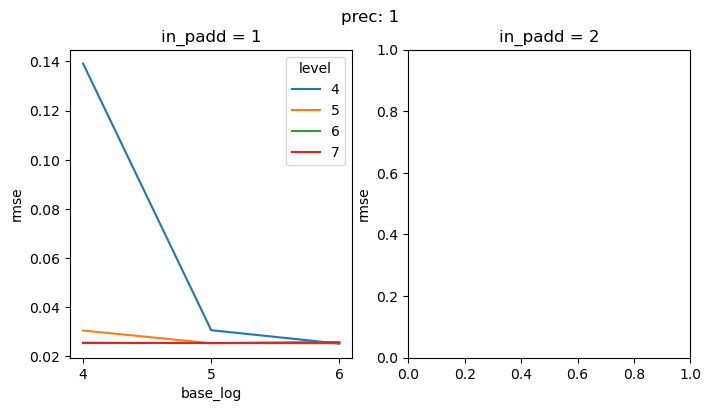

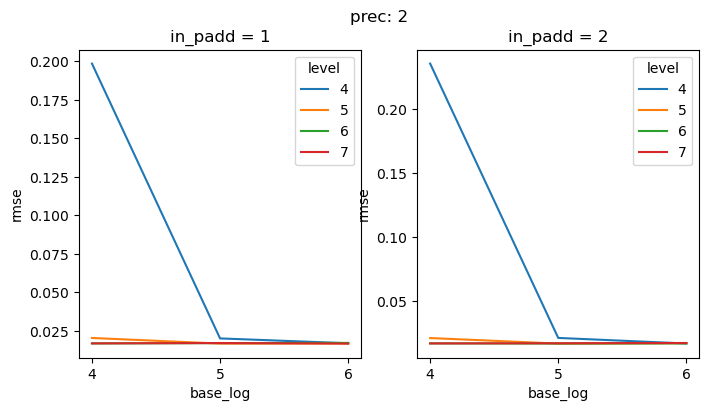

In [116]:
th = 8
key = "def_80_1024_1"
for prec in [1,2]:
  m = 2 # len(df.in_padd.unique())
  fig, axs = plt.subplots(1, 2, figsize = (8,4))  
  for i, in_padd in enumerate(np.sort(df.in_padd.unique())[:m]):
    idx = (df.key == key)&(df.base_log+df.level>=th)&(df.in_padd==in_padd)&(df.in_prec==prec)
    if idx.any():
      df[idx].pivot_table(values="error", index=["level"], 
        columns=["base_log"], aggfunc=rmse).T.plot(ax=axs[i], xticks=df.base_log.unique())
    axs[i].set_ylabel("rmse")
    axs[i].set_title(f"in_padd = {in_padd}") 
  plt.suptitle(f"prec: {prec}")
  plt.show()


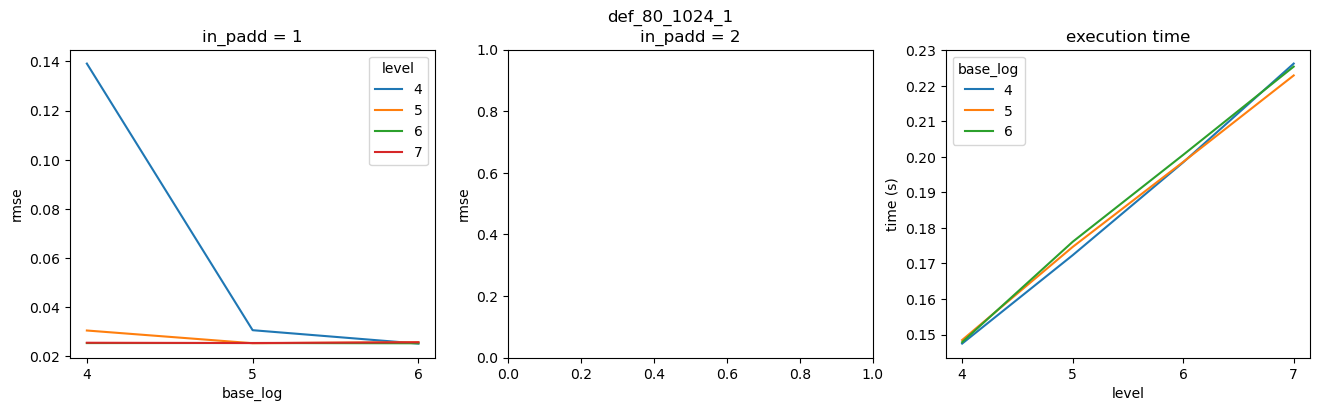

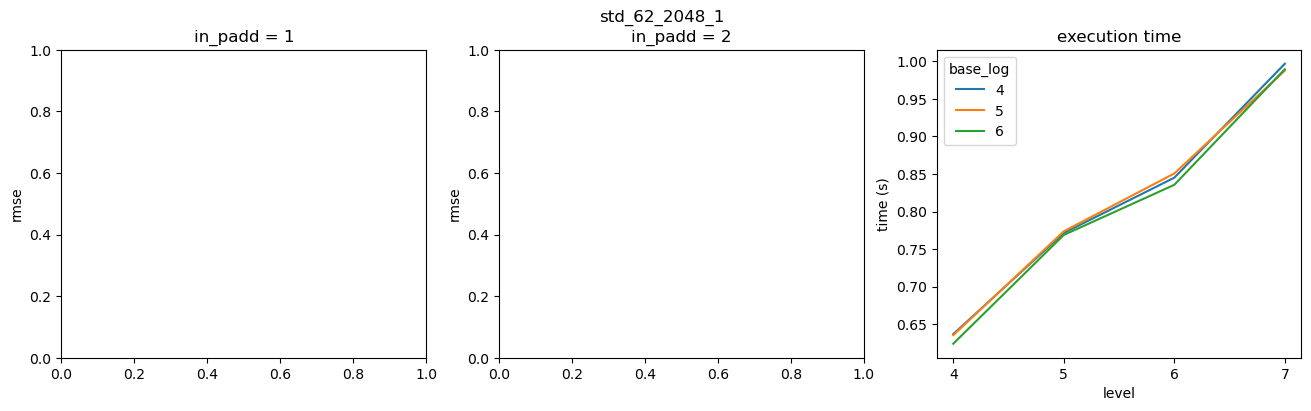

In [111]:
th = 8

for key in key_order[2:]:
  m = 2 # len(df.in_padd.unique())
  fig, axs = plt.subplots(1,1+m, figsize = (4+4*(m+1),4))  
  for i, in_padd in enumerate(np.sort(df.in_padd.unique())[:m]):
    idx = (df.key == key)&(df.base_log+df.level>=th)&(df.in_padd==in_padd)
    if idx.any():
      df[idx].pivot_table(values="error", index=["level"], 
        columns=["base_log"], aggfunc=rmse).T.plot(ax=axs[i], xticks=df.base_log.unique())
    axs[i].set_ylabel("rmse")
    axs[i].set_title(f"in_padd = {in_padd}") 
  idx = (df.key == key)&(df.base_log+df.level>=th)
  df[idx].pivot_table(values="exc_time", index=["level"], 
        columns=["base_log"], aggfunc="mean").plot(ax=axs[-1], xticks=df.level.unique())
  axs[-1].set_ylabel("time (s)")
  axs[-1].set_title("execution time")  
  plt.suptitle(key)
  plt.show()


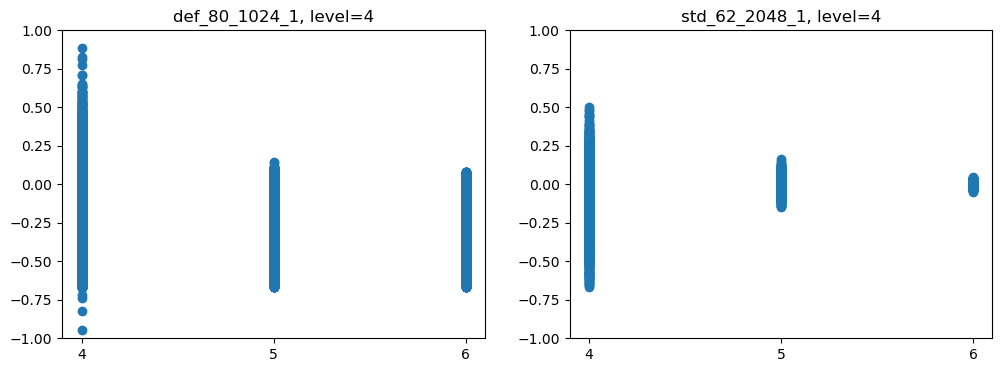

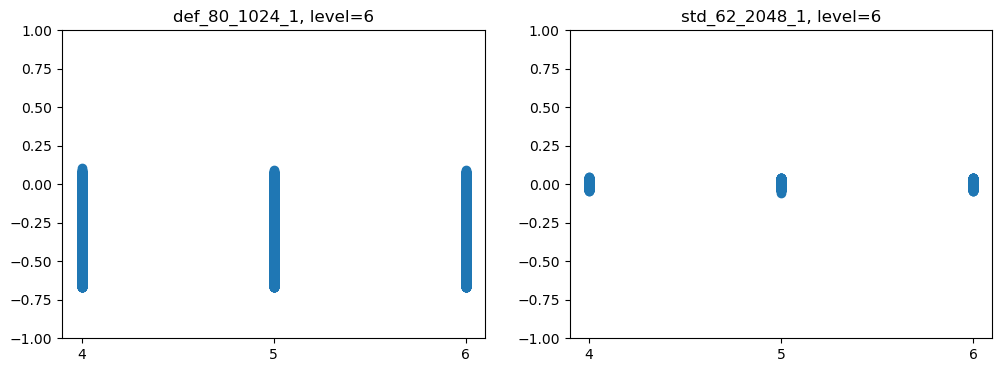

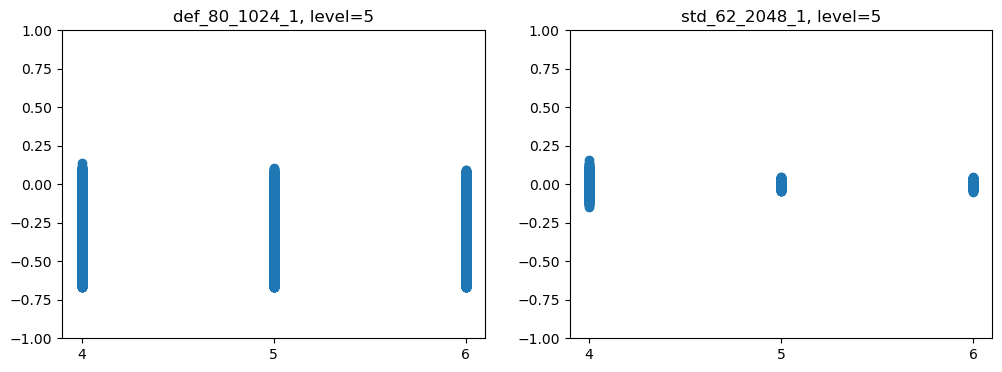

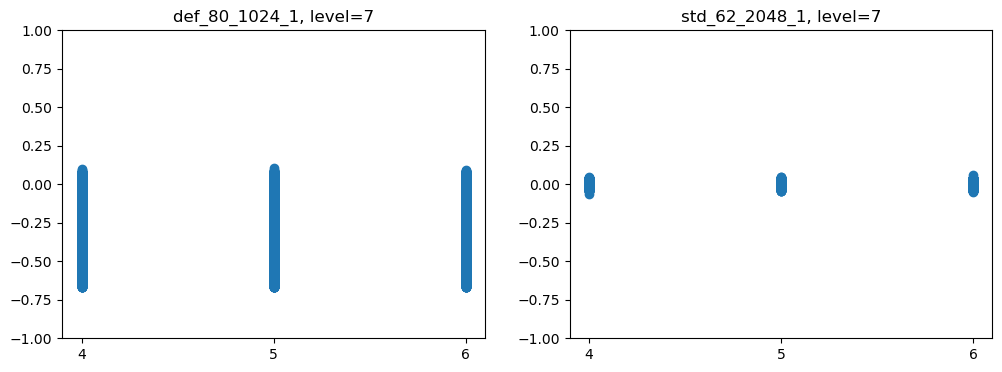

In [88]:
th = 8

for j in df.level.unique():
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    for i, key in enumerate(key_order[2:]):
        idx = (df.key == key)&(df.level==j)&(df.base_log+df.level>=th)
        axs[i].scatter(df.loc[idx,"base_log"],df.loc[idx,"error"])
        axs[i].set_title(f"{key}, level={j}")
        axs[i].set_ylim([-1,1])
        axs[i].set_xticks(df.base_log.unique())
    plt.show()


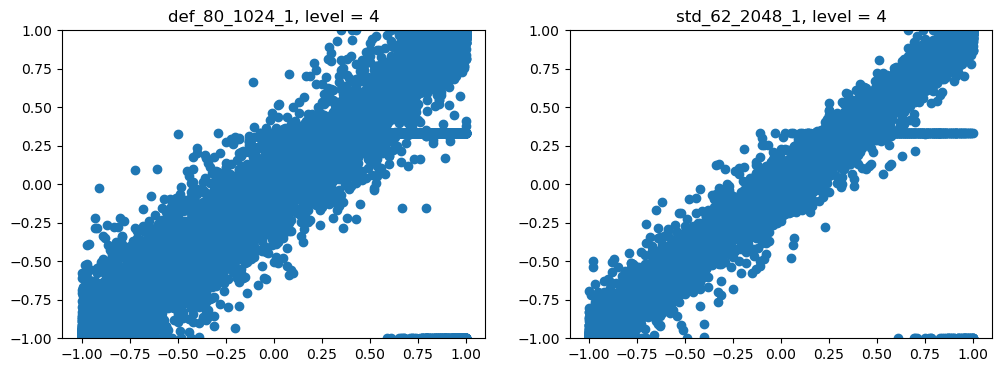

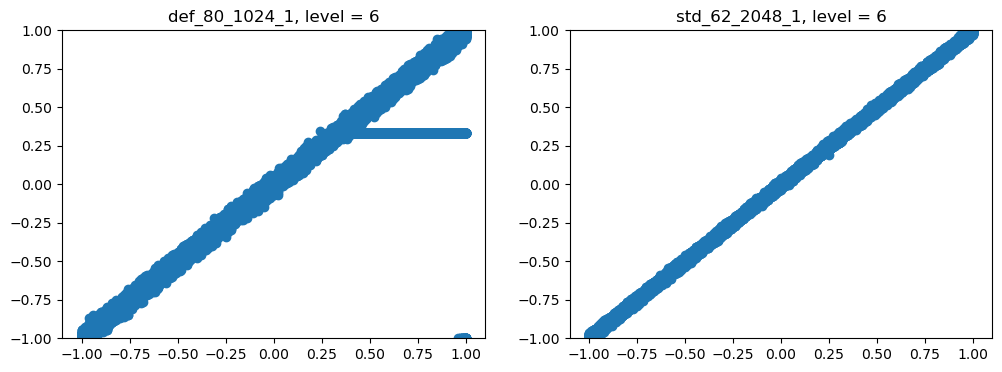

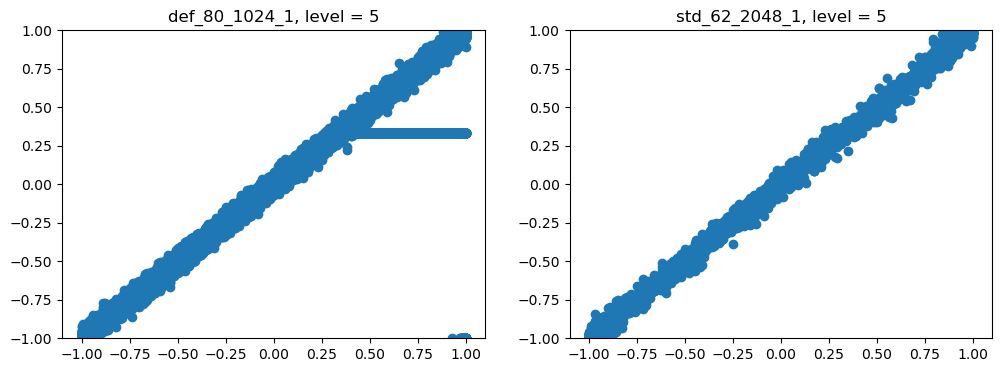

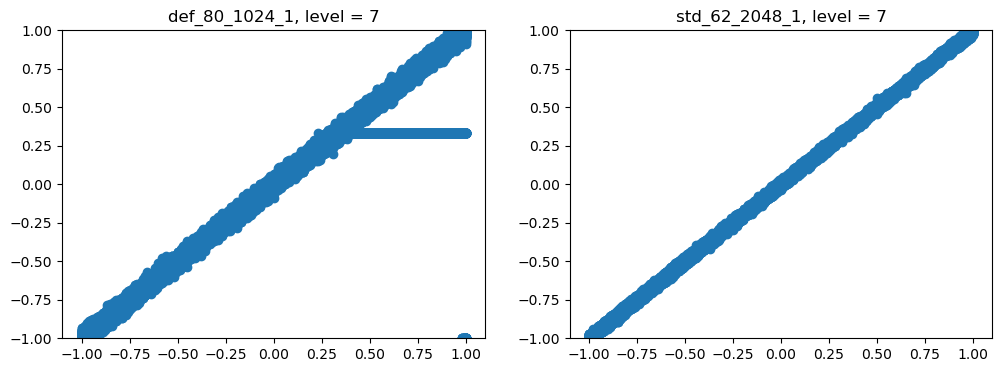

In [89]:
th = 8

for j in df.level.unique():
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    for i, key in enumerate(key_order[2:]):
        idx = (df.key == key)&(df.level==j)&(df.base_log+df.level>=th)
        axs[i].scatter(df.loc[idx,"value"],df.loc[idx,"answer"])
        axs[i].set_title(f"{key}, level = {j}")
        axs[i].set_ylim([-1,1])
    plt.show()


16.0